_Abejide Oluwasegun_
- Project

# Introduction

This No Show Appointment dataset was gotten from Kaggle. It contains over 110,000 patient records for a hospital in Brazil. The records contained in the dataset consists of the PatientId, Appointment Id, Gender, Appointment day, Neighbourhood, Scheduled days for a visit, Age, Alcoholism status, Scholarship status and a brief detail of if a patient is suffering from a few diseases or disability

This analysis looks to answer the following Questions;

- Does gender have an effect on no show appointments?

- Are patients more likely to miss an appointment on a weekday than a weekend?

-  Are older patients more likely to miss an appointment than the younger ones?

- Which neighbourhoods have the highest and least show up rates ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\noshowappointments-kagglev2-may-2016.csv')

DATA INSPECTION


In [3]:
df.shape

(110527, 14)

The Dataset contains 110527 observations and 14 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum().sum()

0

The Dataset contains no null values

In [6]:
df.duplicated().sum()

0

In [7]:
#summary statistics of the dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The Dataset contains no duplicated values

In [8]:
df['Age'].unique()


#There are ages of 0, -1 in the Age column. This needs to be corrected as age cannot be a negative number and babies of age 0 (infants) are too small to make an appoinment.
#This needs to be sorted out
#The maximum age for this dataset happens to be 115

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [9]:
df_age_min = df.query('Age <= 0')

In [10]:
df_age_min.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No


In [11]:
df_age_min.shape

#There are 3540 rows with a negative age or an age equal to zero. They all need to be removed

(3540, 14)

In [12]:
df = df.drop(df[df['Age'] <= 0].index)

In [13]:
df.shape

(106987, 14)

In [14]:
df_min_age = df.query('Age <= 0')

In [15]:
df_min_age.shape

#The 3540 rows with negative ages or ages equal to zero have been succesfully dropped

(0, 14)

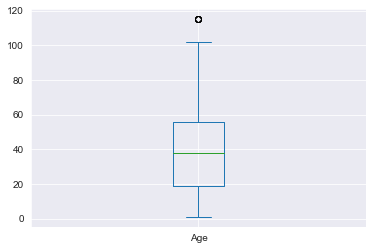

In [16]:
df['Age'].plot(kind = 'box');

#from the boxplot, it is evident the age distribution has an outlier
#the minimum value is 1
#the median is a bit closer to 40

The PatientId column type is float, it needs to be converted to int as Patient Id number cannot be a floating point number

In [17]:
# changing patientId from float to int
df['PatientId'] = (df['PatientId'].astype('int64'))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       106987 non-null  int64 
 1   AppointmentID   106987 non-null  int64 
 2   Gender          106987 non-null  object
 3   ScheduledDay    106987 non-null  object
 4   AppointmentDay  106987 non-null  object
 5   Age             106987 non-null  int64 
 6   Neighbourhood   106987 non-null  object
 7   Scholarship     106987 non-null  int64 
 8   Hipertension    106987 non-null  int64 
 9   Diabetes        106987 non-null  int64 
 10  Alcoholism      106987 non-null  int64 
 11  Handcap         106987 non-null  int64 
 12  SMS_received    106987 non-null  int64 
 13  No-show         106987 non-null  object
dtypes: int64(9), object(5)
memory usage: 12.2+ MB


In [19]:
# How many unique patients appear in this Dataset?

df['PatientId'].nunique()

#There are 60,270 unique Patients in this Dataset

60270

In [20]:
#How many neighbourhoods are represented in this dataset


df.Neighbourhood.nunique()

#There are 81 different neighbourhoods represented in this dataset

81

In [21]:
df.Neighbourhood.value_counts()

#Of the 81 different Neighbourhoods, Jardim Camburi has the highest number of appointees while Parque Industrial has the least number of appointees

#This may have something to do with the proximity of the Neighbourhood to the Clinic, Clinic Quality or just Personal Preference

JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

DATA CLEANING

In [22]:
#The Appointment Id column doesn't seem to be relevant to this Analysis. We can go ahead to drop it

df.drop(['AppointmentID'], axis = 1, inplace = True)

df.shape

(106987, 13)

In [23]:
df.head()

#The Appointment ID column has been successfully dropped

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
#some column names have been misspelt,or have a wrong format. We need to change them

df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap', 'No-show' : 'No_show'}, inplace = True )

In [25]:
df.head()


#The column names have been successfully renamed and reformatted

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
#we need to check if there are still duplicates in the dataset especially after dropping a column


sum(df.duplicated())


# There happens to be an additional 609 duplicated values, we need to drop them

609

In [27]:
duplicates = df[df.duplicated()]

duplicates.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
154,19252634865,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
369,434159987798224,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
371,4497415116,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
466,5161239132968,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÇÃO,0,0,0,0,0,0,No
554,4916355941566,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes


In [28]:
#dropping duplicated values

df.drop_duplicates(inplace = True)

In [29]:
df.duplicated().sum()

#The duplicated values have been successfully dropped

0

In [30]:
df.shape

(106378, 13)

The Schedule day and Appointment day needs to be converted to date time to enable us perform better analysis on the dataset

In [31]:
#converting Schedule day to date time

df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

In [32]:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [33]:
df.info()


#the column types have successfully been changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106378 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106378 non-null  int64              
 1   Gender          106378 non-null  object             
 2   ScheduledDay    106378 non-null  datetime64[ns, UTC]
 3   AppointmentDay  106378 non-null  datetime64[ns, UTC]
 4   Age             106378 non-null  int64              
 5   Neighbourhood   106378 non-null  object             
 6   Scholarship     106378 non-null  int64              
 7   Hypertension    106378 non-null  int64              
 8   Diabetes        106378 non-null  int64              
 9   Alcoholism      106378 non-null  int64              
 10  Handicap        106378 non-null  int64              
 11  SMS_received    106378 non-null  int64              
 12  No_show         106378 non-null  object             
dtypes: datetime64[

In [34]:
df['Handicap'].value_counts()


#More of the appointees are without a disability

0    104160
1      2022
2       182
3        11
4         3
Name: Handicap, dtype: int64

In [35]:
df['Scholarship'].value_counts()

0    95628
1    10750
Name: Scholarship, dtype: int64

In [36]:
df.Age.median()

#the median age is 38 which confirms what was gotten from the boxplot above where the median age was closer to 40

38.0

In [37]:
young_age = df.query('Age < 38')

In [38]:
old_age = df.query('Age >= 38')

In [39]:
young_age.value_counts().sum()

52254

In [40]:
young_age

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
6,733688164476661,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No
10,734536231958495,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110515,645634214296344,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110516,69237724436761,F,2016-06-07 07:45:16+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,0,0,0,0,0,Yes
110517,5574942418928,F,2016-06-07 07:38:34+00:00,2016-06-07 00:00:00+00:00,19,MARIA ORTIZ,0,0,0,0,0,0,No
110519,65423877893936,F,2016-04-27 15:23:14+00:00,2016-06-07 00:00:00+00:00,22,MARIA ORTIZ,0,0,0,0,0,1,No


In [41]:
old_age

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,36355337746436,F,2016-05-03 08:23:40+00:00,2016-06-07 00:00:00+00:00,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2572134369293,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


DATA ANALYSIS

In [84]:
def z_countplot(dfdata, xdata, axlabel, aylabel, atitle, acolor = None,):
    a = sns.countplot(data = dfdata, x = xdata, color = acolor)
    plt.title(atitle)
    plt.xlabel(axlabel)
    plt.ylabel(aylabel)
    return a
    

In [85]:
def barPlot(xdata, ydata, axlabel, aylabel, atitle, aerrwidth = None):
    a = sns.barplot(x = xdata, y = ydata, errwidth = aerrwidth)
    a.set(xlabel = axlabel, ylabel = aylabel, title = atitle)
    return a

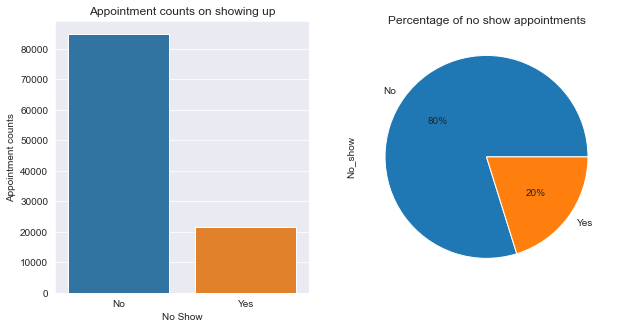

In [44]:
#How is the no show rate like in this dataset

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
z_countplot(df, 'No_show', 'No Show', 'Appointment counts', 'Appointment counts on showing up')

plt.subplot(1,2,2)
df.No_show.value_counts().plot(kind = 'pie', autopct = '%1.0f%%')
plt.title('Percentage of no show appointments')
plt.show()

#QUESTION 1

Does gender have an effect on no show appointments?

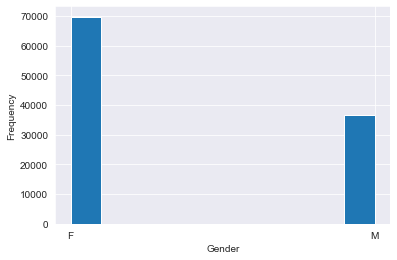

In [45]:
df.Gender.hist()
plt.xlabel("Gender")
plt.ylabel("Frequency");

#There are more female appointments than male

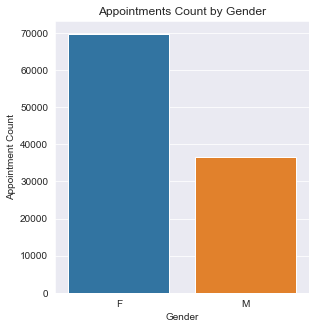

In [46]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
z_countplot(df, 'Gender', 'Gender', 'Appointment Count', 'Appointments Count by Gender');

From the figure above, it appears as though there are more female appointments than there are male. It could mean they take better care of their health than the men or they simply are in more need of medical appointments for a various number of reasons than the men

In [47]:
#checking which of the genders miss more appointments

total_no_of_gender = df['Gender'].value_counts()
total_no_of_gender

F    69706
M    36672
Name: Gender, dtype: int64

In [48]:
no_show_by_gender = df.groupby(['Gender', 'No_show']).count()['Age']
no_show_by_gender

Gender  No_show
F       No         55566
        Yes        14140
M       No         29343
        Yes         7329
Name: Age, dtype: int64

From the result above, the female have a higher number of both missed appointments and kept appoinments. However, this may not be entirely accurate as we have a higher number of women than men in the dataset

In [49]:
#we need to calculate the frequencies for both genders
#for the females

f_proportions = no_show_by_gender['F'] / total_no_of_gender['F']

f_proportions

No_show
No     0.797148
Yes    0.202852
Name: Age, dtype: float64

In [50]:
#for the males

m_proportions = no_show_by_gender['M'] / total_no_of_gender['M']

m_proportions

No_show
No     0.800147
Yes    0.199853
Name: Age, dtype: float64

From the results above there is very little difference in the no show proportion rate between the males and the females

The females have a show up rate of 0.797148 while the males have a show up rate of 0.800147
The females also have a no show up rate of 0.202852 while the males have a no show up rate of 0.199853

we can hereby conclude that gender has little to no effect on the show up rate

# Question2

Does weekday have anything to do with showing up to appointments?



This is a particularly interesting question as the weekday might indeed play a role in determining if a patient shows up to an appointment or not as a lot of people particularly work during the week but have time during the weekends to show up for a medical appointment


In [51]:
#creating new columns for days of the week, month

df['ScheduledDay'] = df['ScheduledDay'].dt.date

In [52]:
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [53]:
df['AppointmentWeekday'] = pd.to_datetime(df.AppointmentDay).dt.day_name()

In [54]:
df['AppointmentMonth'] = pd.to_datetime(df.AppointmentDay).dt.month_name()

In [55]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentWeekday,AppointmentMonth
0,29872499824296,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,April
1,558997776694438,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,April
2,4262962299951,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,April
3,867951213174,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,April
4,8841186448183,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,April


In [56]:
#There are only 3 unique months in the dataset

df['AppointmentMonth'].unique()

array(['April', 'May', 'June'], dtype=object)

In [57]:
#There are appointment everyday except for Sundays

df['AppointmentWeekday'].unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

In [58]:
#are there appointment days before the scheduled day?

df[df['ScheduledDay'] > df['AppointmentDay']]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppointmentWeekday,AppointmentMonth
27033,7839272661752,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,May
55226,7896293967868,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,May
64175,24252258389979,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,May
71533,998231581612122,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,May
72362,3787481966821,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,May


In [59]:
#This looks to be an anomaly as you cannot be scheduled before your appointment day. It needs to be corrected

df.drop(df[df['ScheduledDay'] > df['AppointmentDay']].index, inplace = True)

In [60]:
df.shape

(106373, 15)

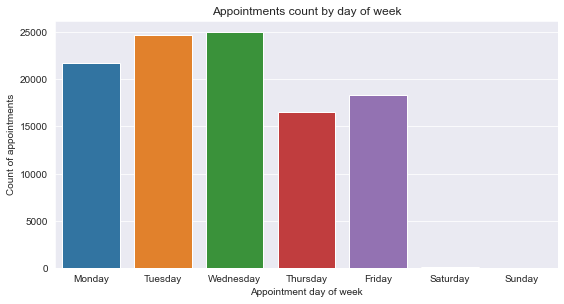

In [61]:
week_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = [9, 10])
plt.subplot(2, 1, 2)
g2 = sns.countplot(data = df, x = 'AppointmentWeekday', order = week_key)
g2.set(xlabel='Appointment day of week', ylabel='Count of appointments', title='Appointments count by day of week')

plt.show()


**_From the image above, most appointments happen to be on Tuesdays and Wednesdays_**

In [62]:
total_no_of_weekdays = df['AppointmentWeekday'].value_counts()
total_no_of_weekdays


Wednesday    24972
Tuesday      24703
Monday       21761
Friday       18313
Thursday     16585
Saturday        39
Name: AppointmentWeekday, dtype: int64

In [63]:
no_show_by_weekday = df.groupby(['AppointmentWeekday', 'No_show']).count()['Age']
no_show_by_weekday

AppointmentWeekday  No_show
Friday              No         14418
                    Yes         3895
Monday              No         17302
                    Yes         4459
Saturday            No            30
                    Yes            9
Thursday            No         13368
                    Yes         3217
Tuesday             No         19729
                    Yes         4974
Wednesday           No         20062
                    Yes         4910
Name: Age, dtype: int64

In [64]:
m_proportions = no_show_by_weekday['Monday'] / total_no_of_weekdays['Monday']
m_proportions

No_show
No     0.795092
Yes    0.204908
Name: Age, dtype: float64

In [65]:
t_proportions = no_show_by_weekday['Tuesday'] / total_no_of_weekdays['Tuesday']
t_proportions

No_show
No     0.798648
Yes    0.201352
Name: Age, dtype: float64

In [66]:
w_proportions = no_show_by_weekday['Wednesday'] / total_no_of_weekdays['Wednesday']
w_proportions

No_show
No     0.80338
Yes    0.19662
Name: Age, dtype: float64

In [67]:
th_proportions = no_show_by_weekday['Thursday'] / total_no_of_weekdays['Thursday']
th_proportions

No_show
No     0.80603
Yes    0.19397
Name: Age, dtype: float64

In [68]:
f_proportions = no_show_by_weekday['Friday'] / total_no_of_weekdays['Friday']
f_proportions

No_show
No     0.78731
Yes    0.21269
Name: Age, dtype: float64

In [69]:
s_proportions = no_show_by_weekday['Saturday'] / total_no_of_weekdays['Saturday']
s_proportions

No_show
No     0.769231
Yes    0.230769
Name: Age, dtype: float64

From the results above, there is a just a very slight difference between the rate of no shows per weekday. The weekday doesn't really have an effect on the no show rate of an individual

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106373 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   PatientId           106373 non-null  int64 
 1   Gender              106373 non-null  object
 2   ScheduledDay        106373 non-null  object
 3   AppointmentDay      106373 non-null  object
 4   Age                 106373 non-null  int64 
 5   Neighbourhood       106373 non-null  object
 6   Scholarship         106373 non-null  int64 
 7   Hypertension        106373 non-null  int64 
 8   Diabetes            106373 non-null  int64 
 9   Alcoholism          106373 non-null  int64 
 10  Handicap            106373 non-null  int64 
 11  SMS_received        106373 non-null  int64 
 12  No_show             106373 non-null  object
 13  AppointmentWeekday  106373 non-null  object
 14  AppointmentMonth    106373 non-null  object
dtypes: int64(8), object(7)
memory usage: 17.0+ MB


# Question 3

are older patients more likely to miss an appointment than the younger ones?

In [71]:
# NoShow column transformation
df['No_show'].replace({'No': 0, 'Yes': 1}, inplace=True)


In [72]:
# NoShow type change
df['No_show'] = df['No_show'].astype('bool')


In [73]:
#converting Schedule day to date time

df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

In [74]:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

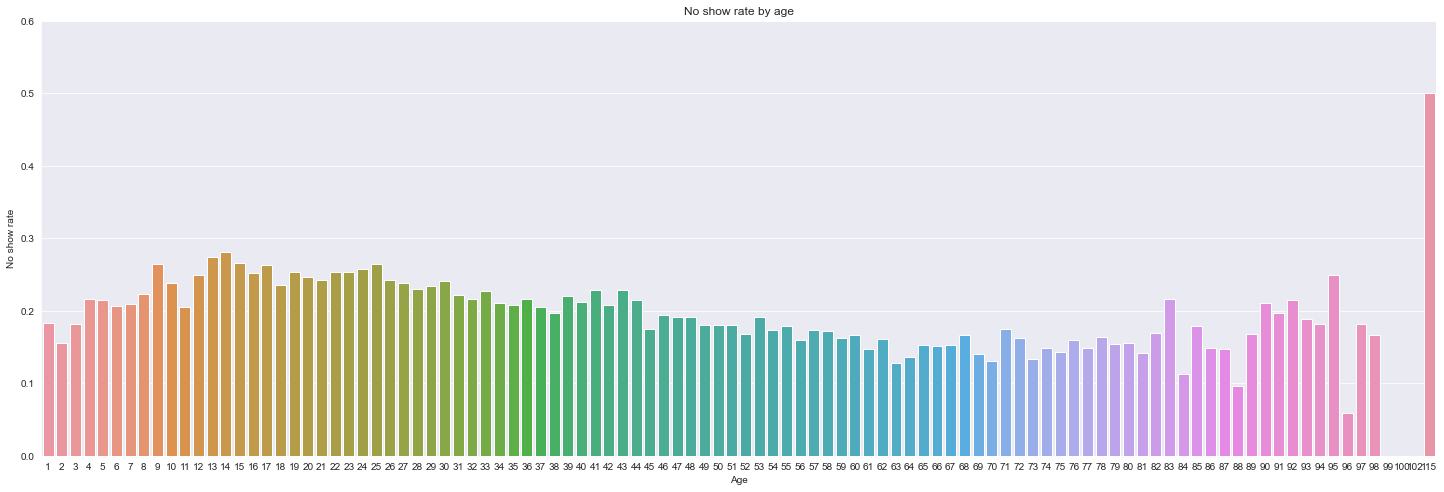

In [75]:
#as age increases between ages 15-80, the no show rate appears to be decreasing
plt.figure(figsize=(25,8))
plt.ylim(0,0.6)
barPlot(df['Age'], df['No_show'], 'Age', 'No show rate', 'No show rate by age', 0)
plt.show()

From the figure above, no show rate in this dataset decreases as age increases. There is a negative correlation between them

In [76]:
df['No_show'].corr(df["Age"])

-0.06756541303341305

# Question 4

which neighbourhoods have the highest and least show up rates ?

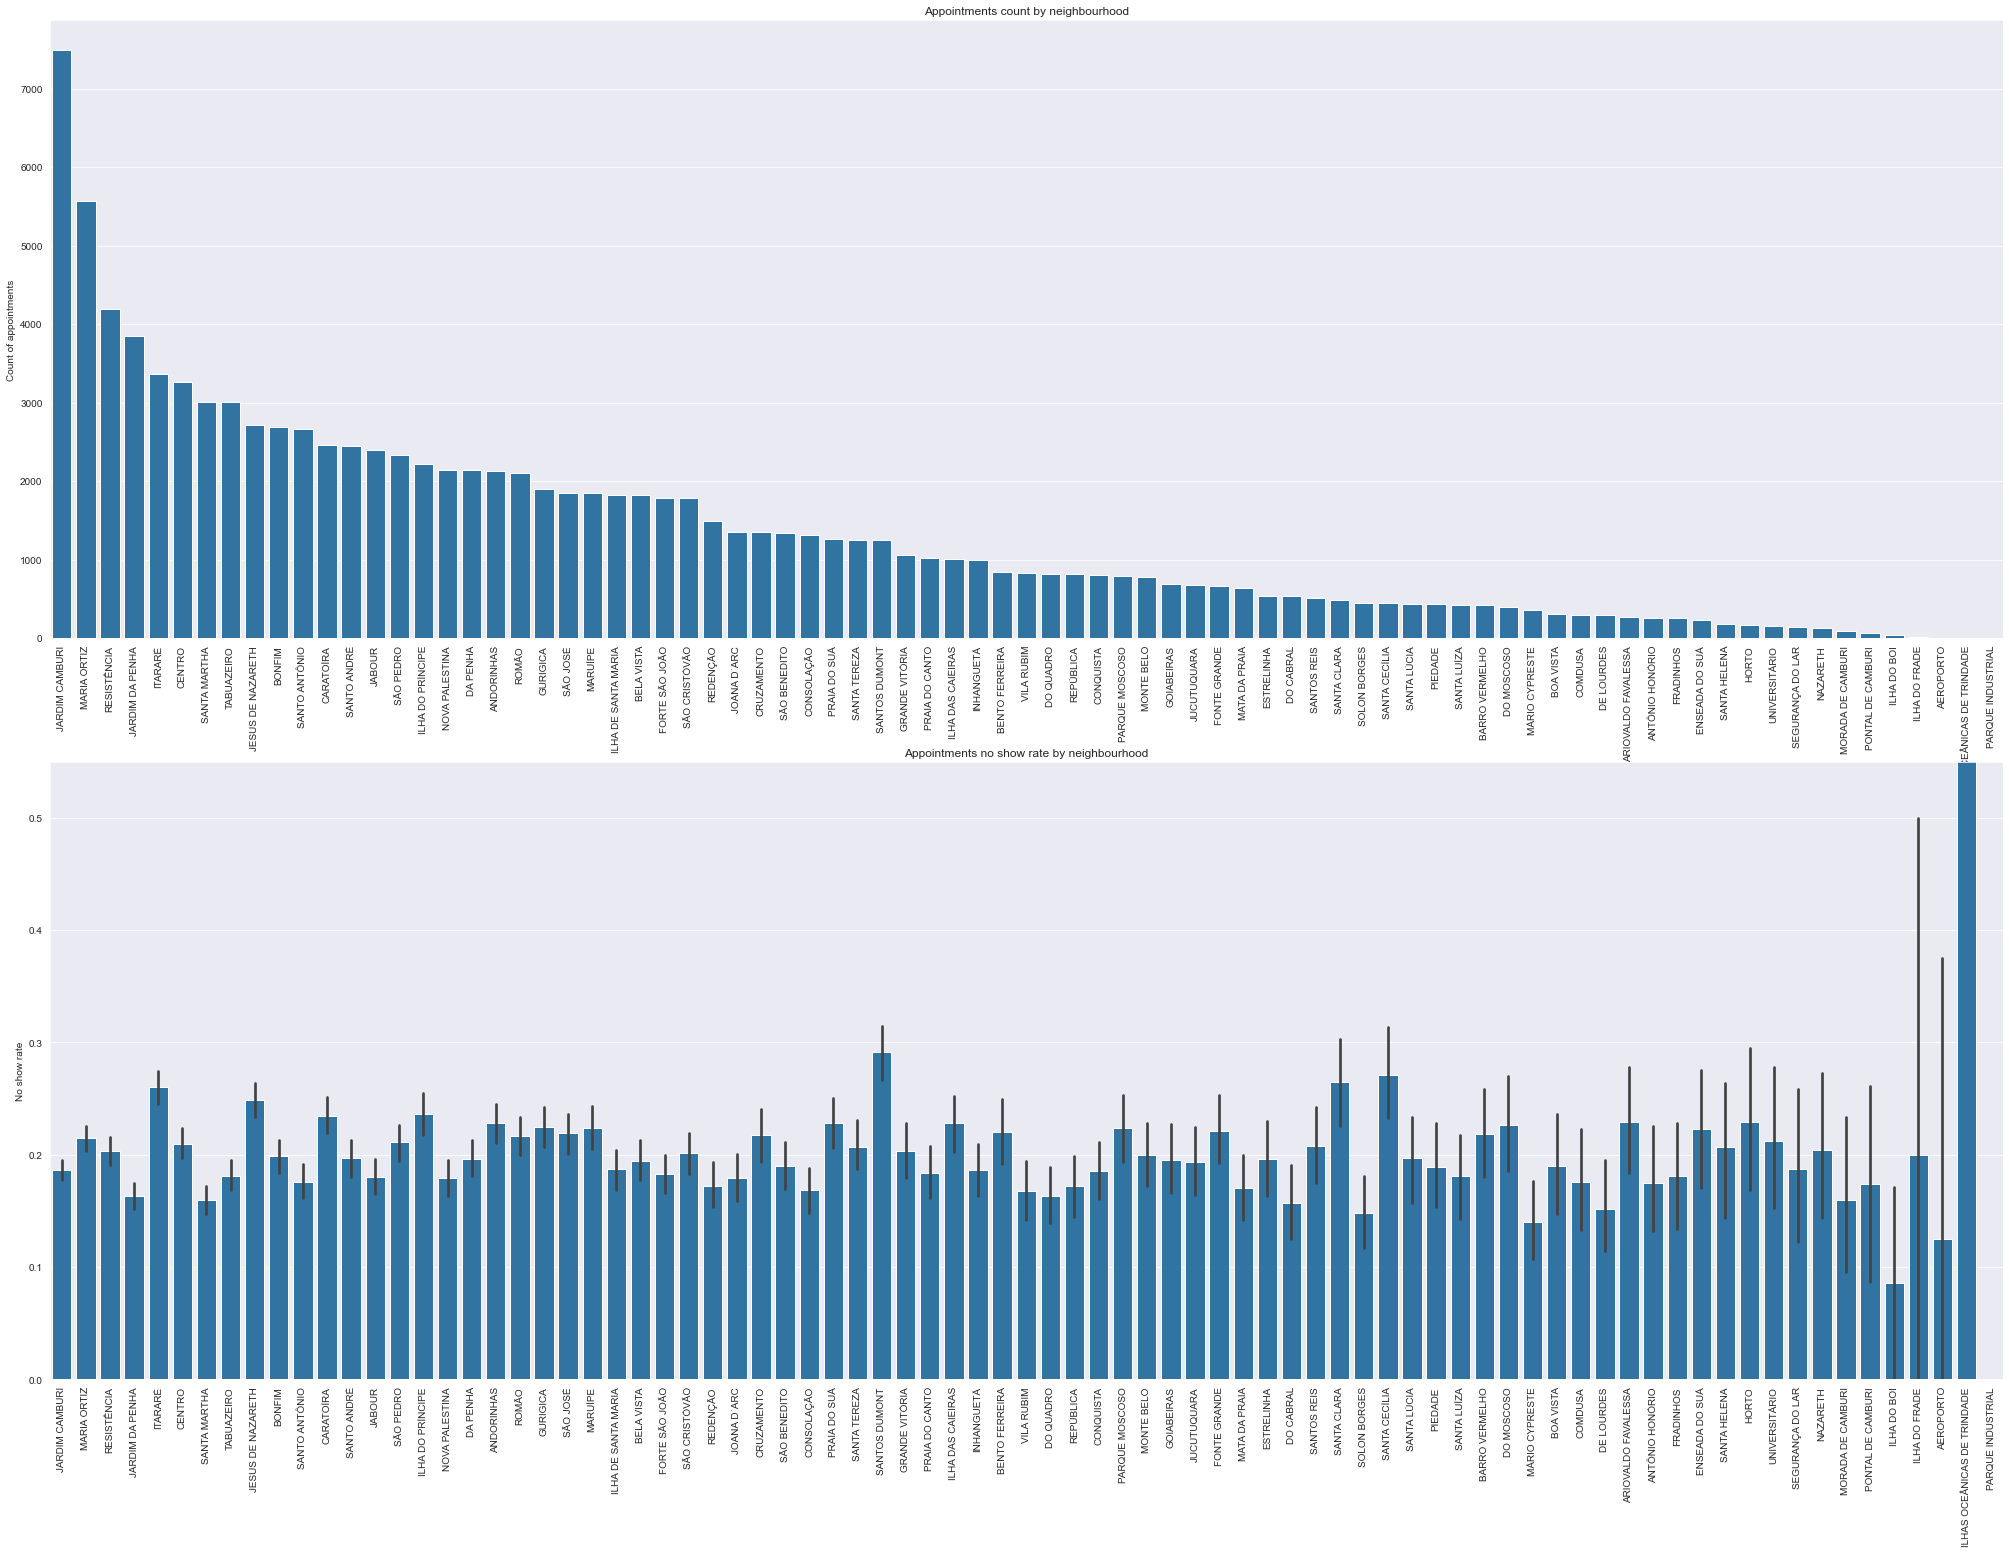

In [77]:
plt.figure(figsize=(35,25))

#Appointment counts by Neighbourhood
plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
g = sns.countplot(data = df, x = 'Neighbourhood', order = df['Neighbourhood'].value_counts().index,color=sns.color_palette()[0])
g.set(ylabel = 'Count of appointments', title = 'Appointments count by neighbourhood')

plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
g = sns.barplot(x = df['Neighbourhood'], y = df['No_show'], order = df['Neighbourhood'].value_counts().index,color=sns.color_palette()[0]);
g.set_title('Appointments no show rate by neighbourhood')
g.set(ylabel='No show rate', ylim=(0,0.55), xlabel='')


plt.show()

# Conclusions


From the analysis above;

Q1. Does gender have an effect on no show appointments?

- Although the dataset contains more female appointment records than male records, there is a very slight difference in the show up rate between the 2 genders. Gender has little or nothing to do with whether a patient shows up for their appointments or not

Q2. Are patients more likely to miss an appointment on a weekday than a weekend?

- Although Tuesday and Wednesday happen to have the highest number of appointments, they all have an identical show up rate. Weekday also has little or nothing to do with showing up for appointments 

Q3. Are older patients more likely to miss an appointment than the younger ones?

- We discovered that the no show rate decreases as the age increases which means that the older a patient gets particularly within the ages of 15 - 80, the less likely they are to keep up with their appointment dates. Older patients are more likely to miss their appointment dates than the younger ones

Q4. Which neighbourhoods have the highest and least show up rates ?

- Although Jardim Camburi has the highest number of appointment counts, it doesn't have the highest no show rate.Ilhas Oceanicas de trinidade  has the highest no show rate in the dataset while Parque Industrial has the least no show rate in the dataset

###### Limitations to this analysis

- The dataset contains records of just 3 months; April, May, June. 

- A wholesome dataset containing records from all the months in the year might be able to give more details and make for a more comprehensive analysis

In [78]:
#df.to_csv('C:\\Users\\Admin\\Desktop\\noshowappointments1.csv', index = False)

references; Kaggle, Github, Google